<a href="https://colab.research.google.com/github/oleksandr-kushnir/Coursera_Capstone/blob/master/Battle_of_Neighborhoods_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Recommendations for Investors who plan to start their Business in Hamburg (Germany)

Applied Data Sciense Capstone Project by IBM/Courcera

## Table of contents
<ul>
<li>Introduction and Problem Statement</li>
<li>Data</li>
<li>Methodology and Analysis</li>
<li>Results</li>
<li>Discussion</li>
<li>Conclusion</li>
</ul>

## Introduction and Problem Statement

Hamburg, the largest city in Germany after the capital of Berlin, its location makes it an important link between the sea and Germany's network of inland waterways and numerous islands. The city is best known for its famous harbor area, the Port of Hamburg. In addition to being a major transportation hub, Hamburg has become one of Europe's most important cultural and commercial centers, as well as a major tourist destination.<br>
Hamburg is an excellent location for nascent entrepreneurs with clever ideas. More than 700 startup businesses are based here, with almost half of their total staff coming from abroad. Founders can benefit from Hamburg’s cosmopolitan flair, high quality of life, and optimum conditions for setting up a business.<br>
<strong>Business Problem</strong><br>
Every international business starting in an unknown area especially in a new country is facing several problems:
Where to find suitable offices and commercial spaces?
What neighborhoods are best for it?<br>
The business location plays a very important role and makes a great contribution to business success. <br>
On the one hand, every business type has its optimal location, eg. restaurants succeed more in areas, that are visited by tourists, and a company office is better situated in a business district.<br>
On the other hand, the crime rate of the neighborhood is also an important factor, that has an impact on business success.<br>
International research has long shown evidence that crime makes communities decline (e.g. Skogan, 1990; Wilson & Kelling, 1982). This decline can be seen in the presence of crime in public places as well as in minor signs of physical and social disorder.<br>
Shoplifting is the biggest concern, and biggest problem, for most small-business owners. When the business is closed, burglary and breaking and entering become another concern in this criminal category.<br>
Most businesses are sensitive to crime in their neighborhoods, especially jewelry shops, liquor stores, banks, hotels, etc.<br>
The audience, who is interested in the information to the problems mentioned above are international companies or startups from foreign cities or countries intending to start or expand their business to Hamburg.<br>


##Data

At first we import all the necessary libraries.
We also install the tabula-py library to read the tables from a PDF file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install tabula-py

     |████████████████████████████████| 10.4MB 6.5MB/s 


Let's read the dataset of Hamburg's neighborhoods using panda's native read_html method.

In [0]:
df_b = pd.read_html('https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs', decimal=',', converters={'Einwohner':str})

We need only the second table.

Let's have a look what we've got.

In [4]:
df_b[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Stadtteil                          104 non-null    object 
 1   Ortsteile                          0 non-null      float64
 2   Bezirk                             104 non-null    object 
 3   Fläche(km²)                        0 non-null      float64
 4   Einwohner                          104 non-null    object 
 5   Bevölkerungsdichte(Einwohner/km²)  104 non-null    int64  
 6   Koordinaten                        104 non-null    object 
 7   Karte                              0 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.6+ KB


The columns 'Einwohner' (population) and 'Koordinaten' (coordinates) have string format, we have to convert them to int and float accordingly, to be able to use them in our calculations.

Let's create a data frame with necessary columns

In [5]:
df_pop = df_b[1][['Stadtteil', 'Bezirk', 'Einwohner', 'Koordinaten']]
df_pop

,Stadtteil,Bezirk,Einwohner,Koordinaten
0,Hamburg-Altstadt,Hamburg-Mitte,2350,"53° 33′ 0″ N, 10° 0′ 0″ O"
1,HafenCity,Hamburg-Mitte,4925,"53° 32′ 28″ N, 10° 0′ 1″ O"
2,Neustadt,Hamburg-Mitte,12.762,"53° 33′ 7″ N, 9° 59′ 8″ O"
3,St. Pauli,Hamburg-Mitte,22.097,"53° 33′ 25″ N, 9° 57′ 50″ O"
4,St. Georg,Hamburg-Mitte,11.358,"53° 33′ 18″ N, 10° 0′ 44″ O"
...,...,...,...,...
99,Hausbruch,Harburg,17.036,"53° 28′ 0″ N, 9° 53′ 0″ O"
100,Neugraben-Fischbek,Harburg,31.589,"53° 29′ 0″ N, 9° 51′ 0″ O"
101,Francop,Harburg,715,"53° 30′ 29″ N, 9° 51′ 10″ O"
102,Neuenfelde,Harburg,4927,"53° 30′ 53″ N, 9° 47′ 44″ O"


The column 'Koordinaten' must be split into Latitude and Longitude.

In [6]:
df_pop[['Latitude', 'Longitude']] = df_pop['Koordinaten'].str.split(',', expand=True)
df_pop.drop(columns='Koordinaten', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Let's rename our columns in English

In [7]:
df_pop.columns=['Neighborhood', 'Borough', 'Population', 'Latitude', 'Longitude']
df_pop

,Neighborhood,Borough,Population,Latitude,Longitude
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53° 33′ 0″ N,10° 0′ 0″ O
1,HafenCity,Hamburg-Mitte,4925,53° 32′ 28″ N,10° 0′ 1″ O
2,Neustadt,Hamburg-Mitte,12.762,53° 33′ 7″ N,9° 59′ 8″ O
3,St. Pauli,Hamburg-Mitte,22.097,53° 33′ 25″ N,9° 57′ 50″ O
4,St. Georg,Hamburg-Mitte,11.358,53° 33′ 18″ N,10° 0′ 44″ O
...,...,...,...,...,...
99,Hausbruch,Harburg,17.036,53° 28′ 0″ N,9° 53′ 0″ O
100,Neugraben-Fischbek,Harburg,31.589,53° 29′ 0″ N,9° 51′ 0″ O
101,Francop,Harburg,715,53° 30′ 29″ N,9° 51′ 10″ O
102,Neuenfelde,Harburg,4927,53° 30′ 53″ N,9° 47′ 44″ O


We convert the Population column into type int, but at first let's get rid of the thousands separator. 

In [8]:
df_pop['Population'] = df_pop['Population'].str.replace('.', '').astype('int')
df_pop

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Borough,Population,Latitude,Longitude
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53° 33′ 0″ N,10° 0′ 0″ O
1,HafenCity,Hamburg-Mitte,4925,53° 32′ 28″ N,10° 0′ 1″ O
2,Neustadt,Hamburg-Mitte,12762,53° 33′ 7″ N,9° 59′ 8″ O
3,St. Pauli,Hamburg-Mitte,22097,53° 33′ 25″ N,9° 57′ 50″ O
4,St. Georg,Hamburg-Mitte,11358,53° 33′ 18″ N,10° 0′ 44″ O
...,...,...,...,...,...
99,Hausbruch,Harburg,17036,53° 28′ 0″ N,9° 53′ 0″ O
100,Neugraben-Fischbek,Harburg,31589,53° 29′ 0″ N,9° 51′ 0″ O
101,Francop,Harburg,715,53° 30′ 29″ N,9° 51′ 10″ O
102,Neuenfelde,Harburg,4927,53° 30′ 53″ N,9° 47′ 44″ O


Now we have to convert the Longitude and Latitude columns, which are in the DMS (degree, minutes, seconds) format to float, to be able to use it by Foursquare API. We'll use regular expressions module therefore.

In [9]:
import re

def degr_conv(degr_str):
  """
  Convert coordinates from DMS format to decimal
  """
  splited = re.split('°|′|″', degr_str)
  dec_list = []
  for value in splited:
    value = value.strip()
    dec_list.append(value)

  dec_degr = int(dec_list[0]) + int(dec_list[1]) / 60 + int(dec_list[2]) / 3600
  return round(dec_degr, 7)

# Let's test our function
degr_conv('9° 59′ 8″  O')

9.9855556

In [10]:
df_pop['Longitude'] = df_pop['Longitude'].apply(degr_conv)
df_pop['Latitude'] = df_pop['Latitude'].apply(degr_conv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_pop.head()

,Neighborhood,Borough,Population,Latitude,Longitude
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222


Now our dataframe is looking good!

Let's drop the neighborhood 'Neuwerk', since it's an unmanned island 

In [12]:
df_pop = df_pop[df_pop['Neighborhood']!='Neuwerk']
df_pop

,Neighborhood,Borough,Population,Latitude,Longitude
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222
...,...,...,...,...,...
99,Hausbruch,Harburg,17036,53.466667,9.883333
100,Neugraben-Fischbek,Harburg,31589,53.483333,9.850000
101,Francop,Harburg,715,53.508056,9.852778
102,Neuenfelde,Harburg,4927,53.514722,9.795556


Let's have a look, how many neighborhoods we have in Hamburg and build a list of it.

In [13]:
neighborhoods = df_pop['Neighborhood'].tolist()
len(neighborhoods)

103

OK, let's read the crime statistics privided by the police on their website as a PDF file, therefore we use the previously installed tabula module. <br> We need only the pages 16-19.

In [14]:
from tabula import read_pdf
df = read_pdf('https://www.polizei.hamburg/contentblob/12289868/49b59e72073b7c5e82c8800d36df8734/data/pks-2018-jahrbuch-do.pdf', pages=[16, 17, 18, 19])

Got stderr: Jun 14, 2020 6:43:15 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Jun 14, 2020 6:43:15 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 14, 2020 6:43:15 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 14, 2020 6:43:15 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 14, 2020 6:43:17 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 14, 2020 6:43:17 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



We get a list of dataframes, let's drop the first one, since we don't use it.

In [0]:
df = df[1:] 

We got data in separate tables with neighborhoods for each borough.
<br>Now the first table is different from others, so let's adjust it.

In [16]:
df[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2017,Unnamed: 3,2018,Zu- / Abnahme,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Stadtteile,NaN,Fälle,NaN,Fälle,aufgeklärt,in %,absolut,in %,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Altstadt,7.58,NaN,6.742,4.15,"61,7",-839,"-11,",NaN,NaN
3,NaN,HafenCity,76.00,NaN,821.000,219,"26,7",60,"7,",NaN,NaN
4,NaN,Neustadt,4.89,NaN,5.063,2.36,"46,8",170,"3,",NaN,NaN
5,NaN,St. Pauli,18.28,NaN,18.790,8.27,"44,0",501,"2,",NaN,NaN
6,NaN,St. Georg,19.16,NaN,20.047,14.19,"70,8",880,"4,",NaN,NaN
7,NaN,Hammerbrook,2.59,NaN,2.359,1.13,"48,1",-232,"-9,",NaN,NaN
8,NaN,Borgfelde,77.00,NaN,692.000,255,"36,8",-79,"-10,",NaN,NaN
9,NaN,Hamm,3.17,NaN,2.872,1.09,"38,0",-303,"-9,",NaN,NaN


Change the column order, to match it with the other tables.

In [0]:
#reassign mistakenly recognized data for the first table to corresponding columns
df[0]['Unnamed: 0'] = df[0]['Unnamed: 1']
df[0]['Unnamed: 1'] = df[0]['Unnamed: 3']

In [18]:
df[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2017,Unnamed: 3,2018,Zu- / Abnahme,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Stadtteile,NaN,NaN,Fälle,NaN,Fälle,aufgeklärt,in %,absolut,in %,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Altstadt,6.742,7.58,NaN,6.742,4.15,"61,7",-839,"-11,",NaN,NaN
3,HafenCity,821.000,76.00,NaN,821.000,219,"26,7",60,"7,",NaN,NaN
4,Neustadt,5.063,4.89,NaN,5.063,2.36,"46,8",170,"3,",NaN,NaN
5,St. Pauli,18.790,18.28,NaN,18.790,8.27,"44,0",501,"2,",NaN,NaN
6,St. Georg,20.047,19.16,NaN,20.047,14.19,"70,8",880,"4,",NaN,NaN
7,Hammerbrook,2.359,2.59,NaN,2.359,1.13,"48,1",-232,"-9,",NaN,NaN
8,Borgfelde,692.000,77.00,NaN,692.000,255,"36,8",-79,"-10,",NaN,NaN
9,Hamm,2.872,3.17,NaN,2.872,1.09,"38,0",-303,"-9,",NaN,NaN


Let's clean the table and drop all the rows, which contain NaN values.

In [0]:
# Let's filter out NaN values in the column
filt = df[0]['Unnamed: 1'].isnull()
df[0] = df[0][~filt]

Some values under 1000 were mistakenly recognized, for example HafenCity has a value 821.000 instead of 821, let's write a funciton, to normalize it.

In [20]:
def norm(x):
  if int(x) < x:
    x *= 1000
  return x

norm(2.000) 

2.0

Let's temporary convert this clumns to string, to match it with other tables.

In [21]:
df[0]['Unnamed: 1'] = df[0]['Unnamed: 1'].apply(norm).astype('int').astype('str')
df[0]['Unnamed: 1']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2      6742
3       821
4      5063
5     18790
6     20047
7      2359
8       692
9      2872
10     3165
11     7442
12      699
13     1319
14      967
15     6432
16      251
17      210
18      120
19      585
20        0
22    78576
Name: Unnamed: 1, dtype: object

OK, since we adjusted the first table and its consistent with others, we can concatenate all the tables to one data set.

In [22]:
df_m = pd.concat(df, ignore_index=True)
df_m

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2017,Unnamed: 3,2018,Zu- / Abnahme,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Altstadt,6742,7.58,NaN,6.742,4.15,"61,7",-839,"-11,",NaN,NaN
1,HafenCity,821,76,NaN,821,219,"26,7",60,"7,",NaN,NaN
2,Neustadt,5063,4.89,NaN,5.063,2.36,"46,8",170,"3,",NaN,NaN
3,St. Pauli,18790,18.28,NaN,18.79,8.27,"44,0",501,"2,",NaN,NaN
4,St. Georg,20047,19.16,NaN,20.047,14.19,"70,8",880,"4,",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
112,Neugraben-Fischbek,2.112,"50,2",2.011,NaN,1.060,"101 5,0",NaN,NaN,NaN,NaN
113,Francop,20,"25,0",31,NaN,5,"-11 -35,5",NaN,NaN,NaN,NaN
114,Neuenfelde,174,"51,7",186,NaN,90,"-12 -6,5",NaN,NaN,NaN,NaN
115,Cranz,24,"62,5",38,NaN,15,"-14 -36,8",NaN,NaN,NaN,NaN


Now we select only the columns we need and rename them in English.

In [23]:
df_m = df_m[['Unnamed: 0', 'Unnamed: 1']] # select only necessary columns from the table
df_m.columns = ['Neighborhood', 'Crimes in 2018'] # rename columns
df_m

,Neighborhood,Crimes in 2018
0,Altstadt,6742
1,HafenCity,821
2,Neustadt,5063
3,St. Pauli,18790
4,St. Georg,20047
...,...,...
112,Neugraben-Fischbek,2.112
113,Francop,20
114,Neuenfelde,174
115,Cranz,24


It's looking good, but we have some inconsistency in neighborhood names in neighborhood dataset and crime dataset, let's adjust it.

In [24]:
df_m.replace(to_replace='Altstadt', value='Hamburg-Altstadt', inplace=True)
df_m.replace(to_replace='Insel Neuwerk', value='Neuwerk', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
df_m

,Neighborhood,Crimes in 2018
0,Hamburg-Altstadt,6742
1,HafenCity,821
2,Neustadt,5063
3,St. Pauli,18790
4,St. Georg,20047
...,...,...
112,Neugraben-Fischbek,2.112
113,Francop,20
114,Neuenfelde,174
115,Cranz,24


OK, let's finish our cleaning choosing only the rows, consitsting neighborhood names.

In [26]:
mask = df_m['Neighborhood'].isin(neighborhoods)
mask.value_counts()

True     103
False     14
Name: Neighborhood, dtype: int64

In [27]:
df_crime_cl = df_m[mask]
df_crime_cl

,Neighborhood,Crimes in 2018
0,Hamburg-Altstadt,6742
1,HafenCity,821
2,Neustadt,5063
3,St. Pauli,18790
4,St. Georg,20047
...,...,...
111,Hausbruch,942
112,Neugraben-Fischbek,2.112
113,Francop,20
114,Neuenfelde,174


So, now we have a dataset with 103 rows, one row for each neighborhood.

In [28]:
df_crime_cl['Crimes in 2018']

0       6742
1        821
2       5063
3      18790
4      20047
       ...  
111      942
112    2.112
113       20
114      174
115       24
Name: Crimes in 2018, Length: 103, dtype: object

Now we get rid of the thousands separator for the rows from other tables.

In [29]:
df_crime_cl['Crimes in 2018'] = df_crime_cl['Crimes in 2018'].str.replace('.', '')
df_crime_cl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Crimes in 2018
0,Hamburg-Altstadt,6742
1,HafenCity,821
2,Neustadt,5063
3,St. Pauli,18790
4,St. Georg,20047
...,...,...
111,Hausbruch,942
112,Neugraben-Fischbek,2112
113,Francop,20
114,Neuenfelde,174


And finally we can convert the 'Crimes in 2018' column to int format.

In [30]:
df_crime_cl.fillna(0, inplace=True)
df_crime_cl['Crimes in 2018'] = df_crime_cl['Crimes in 2018'].astype('int')
df_crime_cl

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Crimes in 2018
0,Hamburg-Altstadt,6742
1,HafenCity,821
2,Neustadt,5063
3,St. Pauli,18790
4,St. Georg,20047
...,...,...
111,Hausbruch,942
112,Neugraben-Fischbek,2112
113,Francop,20
114,Neuenfelde,174


## Methodology and Analysis

Let's have a look on the crime situation in several neighborhoods of Hamburg in 2018.

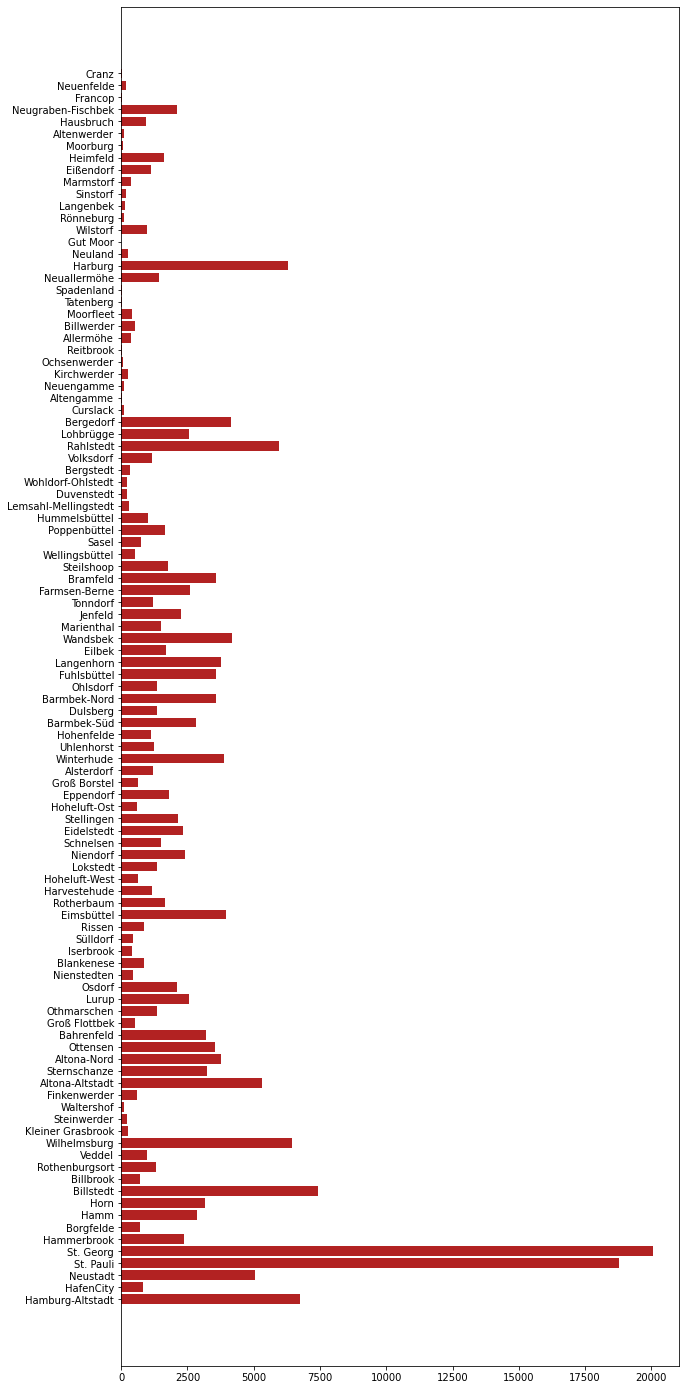

In [31]:
plt.figure(figsize=(10,25))
plt.barh(df_crime_cl['Neighborhood'], df_crime_cl['Crimes in 2018'], color='firebrick')
plt.show()

As we see, our "crime leaders" of Hamburg are the neighborhoods St. Pauli and St. Georg.

Now we can create a master table merging the two datasets together.

In [32]:
df_merged = df_pop.join(df_crime_cl.set_index('Neighborhood'), on='Neighborhood')
df_merged

,Neighborhood,Borough,Population,Latitude,Longitude,Crimes in 2018
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000,6742
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278,821
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556,5063
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889,18790
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222,20047
...,...,...,...,...,...,...
99,Hausbruch,Harburg,17036,53.466667,9.883333,942
100,Neugraben-Fischbek,Harburg,31589,53.483333,9.850000,2112
101,Francop,Harburg,715,53.508056,9.852778,20
102,Neuenfelde,Harburg,4927,53.514722,9.795556,174


In [33]:
df_merged[df_merged['Population']==0]

,Neighborhood,Borough,Population,Latitude,Longitude,Crimes in 2018
16,Waltershof,Hamburg-Mitte,0,53.527778,9.900556,120


Let's create additional columns "Crimes per Capita" by deviding the number of crimes for each neighborhood by its population (replacing 0 in the uninhabited industrial neighborhood "Waltershof" by 1 to avoid devision by zero).

In [34]:
df_merged['Crimes per Capita'] = df_merged['Crimes in 2018'] / df_merged['Population'].replace(to_replace=0, value=1)
df_merged

,Neighborhood,Borough,Population,Latitude,Longitude,Crimes in 2018,Crimes per Capita
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000,6742,2.868936
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278,821,0.166701
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556,5063,0.396725
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889,18790,0.850342
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222,20047,1.765011
...,...,...,...,...,...,...,...
99,Hausbruch,Harburg,17036,53.466667,9.883333,942,0.055295
100,Neugraben-Fischbek,Harburg,31589,53.483333,9.850000,2112,0.066859
101,Francop,Harburg,715,53.508056,9.852778,20,0.027972
102,Neuenfelde,Harburg,4927,53.514722,9.795556,174,0.035316


In [35]:
df_merged['Crimes per Capita'].describe()

count    103.000000
mean       1.671404
std       12.178207
min        0.019164
25%        0.048255
50%        0.070352
75%        0.111496
max      120.000000
Name: Crimes per Capita, dtype: float64

Let's create additional columns "Crimes per Capita" by deviding the number of crimes for each neighborhood by its population.

###Gathering Information about venues in Neighborhods

At first let's import all the necessary libraries.

In [36]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans # import k-means from clustering stage
import folium # map rendering library
import matplotlib.pyplot as plt # library to plot graphs
import numpy as np 

print('Libraries imported.')

Libraries imported.


Lets mark the centers of all neighborhoods of Hamburg with a point on the map.

In [83]:
# point in the middle of our neighborhoods
lat_center = df_merged['Latitude'].mean()
long_center = df_merged['Longitude'].mean()

#create map object with center in the middle of neighborhoods
map_hamburg = folium.Map(location=[lat_center, long_center], zoom_start=10)

# mark all neighborhoods on the map
for lat, lon, bor, neigh in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Borough'], df_merged['Neighborhood']):
  label = 'Borough: \n{},\nNeighborhood: \n{}'.format(bor, neigh)
  folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(map_hamburg)


map_hamburg

Let's build a dataframe with venues and their categories for each neighborhood.

In [0]:
data = []
for row in df_merged.iterrows():
  neigh, bor, pop, lat, lng, cr, cpc = row[1].values
  radius = 600
  # create the API request URL
  url_ = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
              CLIENT_ID, 
              CLIENT_SECRET, 
              VERSION, 
              lat, 
              lng, 
              radius, 
              LIMIT)
  try:
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    for v in results:
      #building DataFrame 
      venue = v['venue']['name']
      category = v['venue']['categories'][0]['name'] 
      data_row = {'Neighborhood': neigh,	'Neighborhoods Latitude': lat,	'Neighborhoods Longitude': lng, 'Venue Name': venue, 'Venue Category': category}
      data.append(data_row)
  except:
    #skip neighborhoods without information
    continue 
df_venues = pd.DataFrame(data)

In [40]:
print(url_)

https://api.foursquare.com/v2/venues/explore?&client_id=L1MM1ECQMJI4EWWW0SA2YOKK2D4PI2A1NHENJX2B5J3GAQLX&client_secret=KL1DMABXU2P2FMB5HPGJ3FSD2SE2KXULSRHKPDSCVP4S3HI2&v=20180605&ll=53.5369444,9.7805556&radius=600&limit=1000


In [41]:
results = requests.get(url_).json()["response"]['groups'][0]['items']
results

[{'reasons': {'count': 0,
   'items': [{'reasonName': 'globalInteractionReason',
     'summary': 'This spot is popular',
     'type': 'general'}]},
  'referralId': 'e-0-4db16e9bf7b1bd003adbeb06-0',
  'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/german_',
      'suffix': '.png'},
     'id': '4bf58dd8d48988d10d941735',
     'name': 'German Restaurant',
     'pluralName': 'German Restaurants',
     'primary': True,
     'shortName': 'German'}],
   'id': '4db16e9bf7b1bd003adbeb06',
   'location': {'address': 'Estedeich 88',
    'cc': 'DE',
    'city': 'Hamburg',
    'country': 'Deutschland',
    'distance': 284,
    'formattedAddress': ['Estedeich 88', '21129 Hamburg', 'Deutschland'],
    'labeledLatLngs': [{'label': 'display',
      'lat': 53.534702,
      'lng': 9.778484}],
    'lat': 53.534702,
    'lng': 9.778484,
    'postalCode': '21129',
    'state': 'Hamburg'},
   'name': 'Gasthaus zur Post',
   'photos': {'count': 0, 'groups': []}}},
 {

So, we got 1833 venues for all our neighborhods. <br>
Our table got two new columns: 'Venue Name' and 'Venue Category'.

And how many unique categories are there?

In [43]:
len(df_venues['Venue Category'].unique())

249

Let's have a look on venue distribution in Hamburg (we show the main 40 categories).

<function matplotlib.pyplot.show>

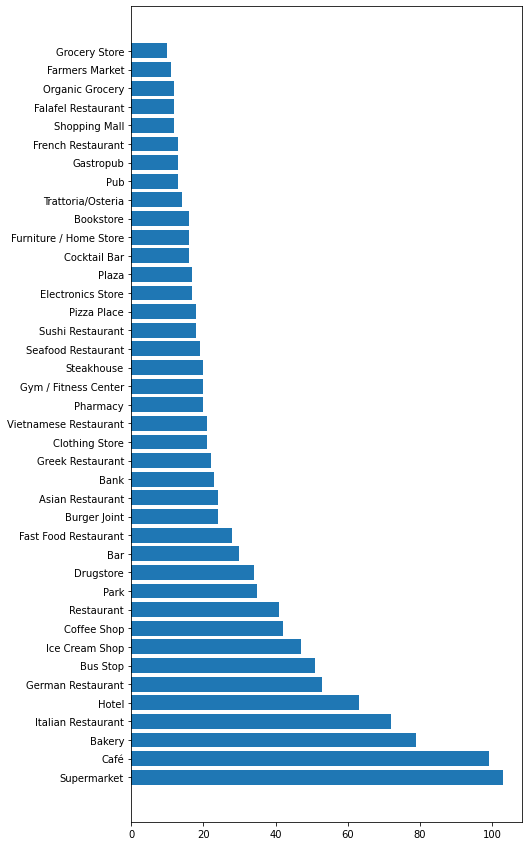

In [44]:
ven_distr = df_venues['Venue Category'].value_counts()[:40]
plt.figure(figsize=(7, 15))
plt.barh(ven_distr.index, ven_distr.values)
plt.show

Prepare some fits in German special charachters

In [0]:
df_merged['Neighborhood'] = df_merged['Neighborhood'].str.replace('ü','ue')
df_merged['Neighborhood'] = df_merged['Neighborhood'].str.replace('ö','oe')
df_merged['Neighborhood'] = df_merged['Neighborhood'].str.replace('ß','ss')

To be able to use thess data by KMeans clustering algorithm lets apply onehot ecoding to convert venue categories.

In [46]:
venues_onehot = pd.get_dummies(df_venues['Venue Category'])
venues_onehot

,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,...,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's add to the onehot dataset the columns 'Neighborhood',	'Neighborhoods Latitude',	'Neighborhoods Longitude' the venues dataset.

In [0]:
venues_onehot[['Neighborhood',	'Neighborhoods Latitude',	'Neighborhoods Longitude']] = df_venues[['Neighborhood',	'Neighborhoods Latitude',	'Neighborhoods Longitude']]

Now let's create a dataset for the KMeans clustering algorithm. <br>
We group our onehot dataset by the column 'Neighborhood' and apply the mean method.

In [48]:
venues_cluster = venues_onehot.groupby(by='Neighborhood', as_index=False).mean()
venues_cluster

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,...,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Neighborhoods Latitude,Neighborhoods Longitude
0,Allermöhe,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.111111,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0,53.486111,10.154167
1,Alsterdorf,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.090909,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0,53.610833,10.013056
2,Altenwerder,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,1.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0,53.506944,9.917778
3,Altona-Altstadt,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.017857,0.000,0.017857,0.000,0.035714,0.000000,0.0,0.017857,0.017857,0.0,0.0,0.0,0.017857,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.017857,0.017857,0.0,0.000,0.0,0.0,0.000000,0.017857,0.0,53.548889,9.947778
4,Altona-Nord,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.025000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.000000,0.025000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.025,0.000000,0.025,0.050000,0.000000,0.0,0.000000,0.025000,0.0,0.0,0.0,0.000000,0.025,0.0,0.0,0.0,0.000000,0.025,0.0,0.000000,0.000000,0.0,0.025,0.0,0.0,0.000000,0.000000,0.0,53.563056,9.945278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Wellingsbüttel,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,

Now run k-means to cluster the neighborhood into 5 clusters and show the output labels

In [49]:
X = venues_cluster.drop(columns=['Neighborhood',	'Neighborhoods Latitude',	'Neighborhoods Longitude'], axis=1)
X

,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,...,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.111111,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.090909,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,1.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.017857,0.000,0.017857,0.000,0.035714,0.000000,0.0,0.017857,0.017857,0.0,0.0,0.0,0.017857,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.017857,0.017857,0.0,0.000,0.0,0.0,0.000000,0.017857,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.025000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.000000,0.025000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.05,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.025,0.000000,0.025,0.050000,0.000000,0.0,0.000000,0.025000,0.0,0.0,0.0,0.000000,0.025,0.0,0.0,0.0,0.000000,0.025,0.0,0.000000,0.000000,0.0,0.025,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.

Let's try to apply the elbow method to find the best ammount of clusters.

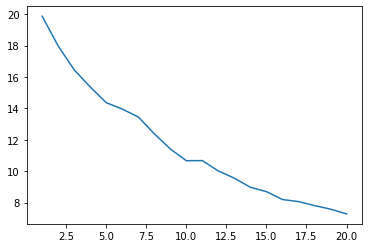

In [50]:
n = 20
inertia_list = []

for n_clusters in range(1, n+1):
  kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(X)
  inertia_list.append(kmeans.inertia_)
plt.figure()
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Sum of squared distances'
plt.plot(range(1, n+1), inertia_list)
plt.show()

Since we dont observe a clear "elbow" on the graph, let's assign the number of clusters intitively to 6 and fit our model. 

In [51]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(X)

venues_cluster['Label'] = kmeans.labels_
venues_cluster

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,...,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Neighborhoods Latitude,Neighborhoods Longitude,Label
0,Allermöhe,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.111111,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0,53.486111,10.154167,5
1,Alsterdorf,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.090909,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0,53.610833,10.013056,5
2,Altenwerder,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000,1.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.0,53.506944,9.917778,5
3,Altona-Altstadt,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.017857,0.000,0.017857,0.000,0.035714,0.000000,0.0,0.017857,0.017857,0.0,0.0,0.0,0.017857,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.017857,0.017857,0.0,0.000,0.0,0.0,0.000000,0.017857,0.0,53.548889,9.947778,5
4,Altona-Nord,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.025000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.000000,0.025000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.025,0.000000,0.025,0.050000,0.000000,0.0,0.000000,0.025000,0.0,0.0,0.0,0.000000,0.025,0.0,0.0,0.0,0.000000,0.025,0.0,0.000000,0.000000,0.0,0.025,0.0,0.0,0.000000,0.000000,0.0,53.563056,9.945278,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Wellingsbüttel,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.000000,0.000000,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.

Let's see the proportions of our clusters.

In [0]:
# define the colors for clusters
colors = ['green', 'blue', 'brown', 'red', 'darkcyan', 'purple', 'pink']

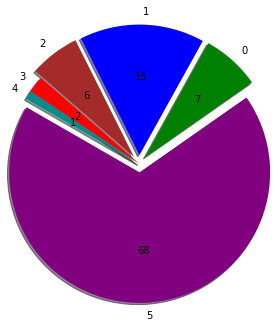

In [53]:
cl_count = venues_cluster['Label'].value_counts(sort=False)
plt.figure(20)
plt.pie(cl_count.values, 
        labels=cl_count.index, 
        radius=1.5,
        explode = (0.1, 0.1, 0.1, 0, 0, 0.1),
        shadow=True,
        colors=colors,
        autopct='%d',
        startangle=35)
plt.show()

We see, our main clusters are 0, 1, 2 and 5. <br> Let's find out the main 10 venue categories for each cluster, analyze and name them.

In [54]:
# let's group neighborhoods by clusters
neighborhoods_clustered = []
for i in range(n_clusters):
   cluster_list = venues_cluster[venues_cluster['Label'] == i]['Neighborhood'].to_list()
   neighborhoods_clustered.append(cluster_list)

#and have a look on top 10 categories for each cluster
#list of categories of each cluster
categories_cl_list = []
for cluster in neighborhoods_clustered:
  #categories for each cluster
  categories_cl = pd.Series()
  for neighborhood in cluster:
    # categories for each neighborhood
    neighborhood_cat  = df_venues[df_venues['Neighborhood'] == neighborhood]['Venue Category']
    categories_cl = categories_cl.append(neighborhood_cat)
  categories_cl_list.append(categories_cl)

def plot_cluster(label):
  """
  Function plots on a barchart top-10 categories for a cluster
  :input: cluster label
  """
  print('Cluster label {}, color:{}'.format(label, colors[label]))
  categories = categories_cl_list[label].value_counts().index[:10]
  ammount = categories_cl_list[label].value_counts().values[:10]
  plt.figure()
  plt.title = 'Cluster label {}'.format(label)
  plt.xticks(rotation=60)
  plt.bar(categories, ammount, color=colors[label])
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


Cluster label 5, color:purple


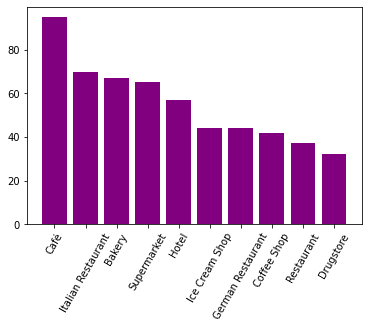

In [55]:
plot_cluster(5)

<strong>Cluster 5 (purple)</strong> is our biggest cluster. <br> The most common venues here are restaurants, cafes but also supermarkets. A lot of cafes and restaurants are mostly in tourist areas and supermarkets are mostly in resindetial areas. So, we name cluster 5 <strong>Tourist and Residential area.</strong>

Cluster label 0, color:green


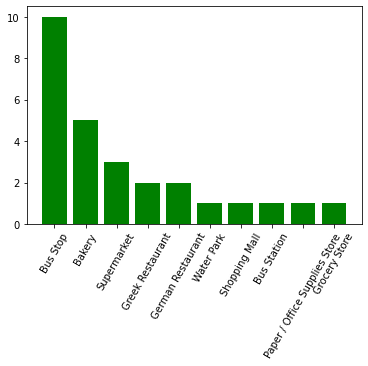

Neighborhoods: ['Othmarschen', 'Marmstorf', 'Wilstorf', 'Rönneburg', 'Eißendorf', 'Horn', 'Langenbek']


In [56]:
plot_cluster(0)
print('Neighborhoods:', venues_cluster[venues_cluster['Label']==0]['Neighborhood'].value_counts().index.tolist())

<strong>In cluster 0 (green)</strong> the most common venues are supermarkets, cafes and there are some business centers. <br> So, we name cluster 0 <strong>Residential and Business area.</strong>

Cluster label 1, color:blue


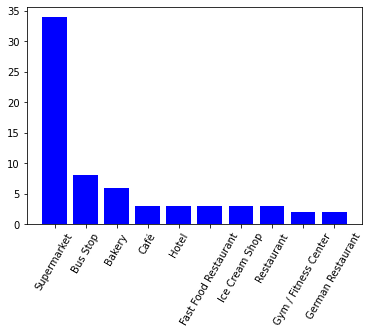

In [57]:
plot_cluster(1)

<strong>In cluster 1 (blue)</strong> the most common venues are supermarkets, cafes and restaurants. <br> Supermarkets are the most common venue here. So, we name cluster 1 <strong>Dynamic Residential Area.</strong>

Cluster label 2, color:brown


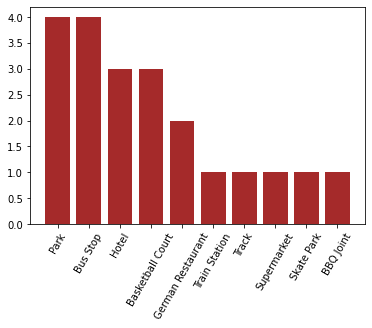

In [58]:
plot_cluster(2)

<strong>In cluster 2 (brown)</strong> the most common venues are parks, hotels and sport places. <br>So, let's call cluster 2 <strong>Recreation area.</strong>

Cluster label 3, color:red


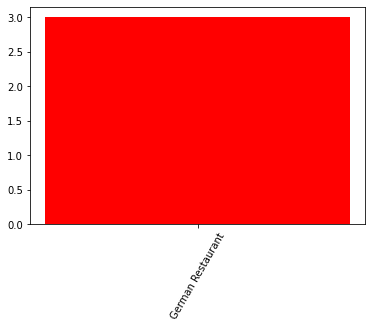

Neighborhoods: ['Cranz', 'Moorburg']


In [59]:
plot_cluster(3)
print('Neighborhoods:', venues_cluster[venues_cluster['Label']==3]['Neighborhood'].value_counts().index.tolist())

<strong>Cluster 3 (red)</strong> consists only of one category: German Restaurant. So, it seems to be a quiet residental area with no tourism. <br>Let's call this cluster <strong>Traditional Residential Area.</strong>

Cluster label 4, color:darkcyan


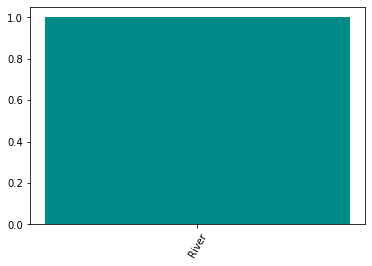

70    Reitbrook
Name: Neighborhood, dtype: object

In [60]:
plot_cluster(4)
venues_cluster[venues_cluster['Label']==4]['Neighborhood']

<strong>Cluster 4 (darkcyan)</strong> is the smallest, it's the nature reserve of the neighborhood "Reitbrock".<br>So, let's call cluster 4 <strong>Nature Reserve.</strong>

In [0]:
  # lets create a mapping dictionary between labels and names
  label_map = {
      0:'Residential and Business Area',
      1:'Dynamic Residential Area',
      2:'Recreation Area',
      3:'Traditional Residential Area',
      4:'Nature Reserve',
      5:'Tourist and Residetial Area',
  }

Finaly, let's plot the resulting clusters on the map

In [62]:
 # point in the middle of our neighborhoods
lat_center1 = venues_cluster['Neighborhoods Latitude'].mean()
long_center1 = venues_cluster['Neighborhoods Longitude'].mean()

#create map object with center in the middle of neighborhoods
map_clusters = folium.Map(location=[lat_center1, long_center1], zoom_start=10.4)

# mark all neighborhoods on the map
for lat, lon, neigh, color in zip(venues_cluster['Neighborhoods Latitude'], venues_cluster['Neighborhoods Longitude'], venues_cluster['Neighborhood'], venues_cluster['Label']):
  label = 'Neighborhood: \n{} \nCluster: {}'.format(neigh, label_map[color])
  folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=colors[color],
        fill=True,
        fill_opacity=0.8,
        parse_html=False).add_to(map_clusters)


map_clusters

Now lets label the crime dataset.

In [0]:
# Let's some some fits to German special charachters
venues_cluster['Neighborhood'] = venues_cluster['Neighborhood'].str.replace('ü','ue')
venues_cluster['Neighborhood'] = venues_cluster['Neighborhood'].str.replace('ö','oe')
venues_cluster['Neighborhood'] = venues_cluster['Neighborhood'].str.replace('ß','ss')

In [64]:
df_labeled = df_merged.join(venues_cluster[['Neighborhood', 'Label']].set_index('Neighborhood'), on='Neighborhood', how='inner')
df_labeled

,Neighborhood,Borough,Population,Latitude,Longitude,Crimes in 2018,Crimes per Capita,Label
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000,6742,2.868936,5
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278,821,0.166701,5
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556,5063,0.396725,5
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889,18790,0.850342,5
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222,20047,1.765011,5
...,...,...,...,...,...,...,...,...
98,Altenwerder,Harburg,3,53.506944,9.917778,93,31.000000,5
99,Hausbruch,Harburg,17036,53.466667,9.883333,942,0.055295,5
101,Francop,Harburg,715,53.508056,9.852778,20,0.027972,5
102,Neuenfelde,Harburg,4927,53.514722,9.795556,174,0.035316,1


Let's have a look at the "Crimes per Capita" data destribution at the hostogram plot trying different ammount of bins.

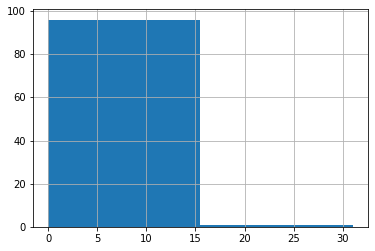

In [65]:
df_labeled['Crimes per Capita'].hist(bins=2)

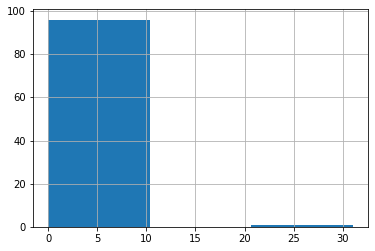

In [66]:
df_labeled['Crimes per Capita'].hist(bins=3)

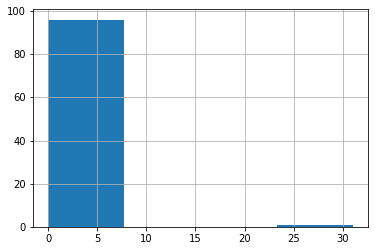

In [67]:
df_labeled['Crimes per Capita'].hist(bins=4)

The historgram with 2 bins makes mors sence, so let's describe the crime situation in the city in 2 categories: "LOW", and "HIGH". Therefore we create a column "Crime Situation" with this categorical variable. 

In [68]:
df_labeled['Crimes per Capita'].describe()

count    97.000000
mean      0.533579
std       3.207340
min       0.023352
25%       0.049032
50%       0.071674
75%       0.109977
max      31.000000
Name: Crimes per Capita, dtype: float64

In [69]:
df_labeled['Cluster'] = df_labeled['Label'].apply(lambda x: label_map[x])
df_labeled['Crime Situation'] = df_labeled['Crimes per Capita'].apply(lambda x: "HIGH" if x > df_labeled['Crimes per Capita'].mean() else "LOW")
df_labeled

,Neighborhood,Borough,Population,Latitude,Longitude,Crimes in 2018,Crimes per Capita,Label,Cluster,Crime Situation
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000,6742,2.868936,5,Tourist and Residetial Area,HIGH
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278,821,0.166701,5,Tourist and Residetial Area,LOW
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556,5063,0.396725,5,Tourist and Residetial Area,LOW
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889,18790,0.850342,5,Tourist and Residetial Area,HIGH
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222,20047,1.765011,5,Tourist and Residetial Area,HIGH
...,...,...,...,...,...,...,...,...,...,...
98,Altenwerder,Harburg,3,53.506944,9.917778,93,31.000000,5,Tourist and Residetial Area,HIGH
99,Hausbruch,Harburg,17036,53.466667,9.883333,942,0.055295,5,Tourist and Residetial Area,LOW
101,Francop,Harburg,715,53.508056,9.852778,20,0.027972,5,Tourist and Residetial Area,LOW
102,Neuenfelde,Harburg,4927,53.514722,9.795556,174,0.035316,1,Dynamic Residential Area,LOW


In [70]:
df_labeled['Crime Situation'].value_counts()

LOW     92
HIGH     5
Name: Crime Situation, dtype: int64

Let's drop the columns 'Crimes in 2018' and 'Crimes per Capita' since we don't use them any more.

In [0]:
df_labeled.drop(['Crimes in 2018', 'Crimes per Capita'], inplace=True, axis=1)

And what are the neighborhoods with the "HIGH" crime rate?

In [72]:
df_labeled[df_labeled['Crime Situation']=="HIGH"]

,Neighborhood,Borough,Population,Latitude,Longitude,Label,Cluster,Crime Situation
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000,5,Tourist and Residetial Area,HIGH
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889,5,Tourist and Residetial Area,HIGH
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222,5,Tourist and Residetial Area,HIGH
15,Steinwerder,Hamburg-Mitte,33,53.534444,9.957222,5,Tourist and Residetial Area,HIGH
98,Altenwerder,Harburg,3,53.506944,9.917778,5,Tourist and Residetial Area,HIGH


Neighborhoods Steinwerder and Altenwerder got their “HIGH” status due to its low population, in fact, they are unpopulated, so we can set their status to ”LOW”.

In [0]:
df_labeled.loc[15, 'Crime Situation'] = "LOW"
df_labeled.loc[98, 'Crime Situation'] = "LOW"

Let's check it again.

In [74]:
df_labeled[df_labeled['Crime Situation']=="HIGH"]

,Neighborhood,Borough,Population,Latitude,Longitude,Label,Cluster,Crime Situation
0,Hamburg-Altstadt,Hamburg-Mitte,2350,53.550000,10.000000,5,Tourist and Residetial Area,HIGH
3,St. Pauli,Hamburg-Mitte,22097,53.556944,9.963889,5,Tourist and Residetial Area,HIGH
4,St. Georg,Hamburg-Mitte,11358,53.555000,10.012222,5,Tourist and Residetial Area,HIGH


Lets plot the crime rate of the city on the map.

In [0]:
 # map the geojson data
 hamburg_geo = r'/content/stadtteile_hamburg.geojson' # geojson file

In [76]:
crime_map = folium.Map(location=[lat_center1, long_center1], zoom_start=10.4)

crime_map.choropleth(
    geo_data=hamburg_geo,
    data=df_merged,
    columns=['Neighborhood', 'Crimes in 2018'],
    key_on='feature.properties.stadtteil',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime in 2018'
)

# mark all neighborhoods on the map
for lat, lon, neigh, color in zip(venues_cluster['Neighborhoods Latitude'], venues_cluster['Neighborhoods Longitude'], venues_cluster['Neighborhood'], venues_cluster['Label']):
  label = 'Neighborhood: \n{} \nTop-Venues: {}'.format(neigh, label_map[color])
  folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=colors[color],
        fill=True,
        fill_opacity=0.5,
        parse_html=False).add_to(crime_map)

# display map
crime_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Results
In this study, we clustered the neighborhoods of Hamburg based on their venues. We combined the neighborhood dataset and the crime information for each neighborhood to provide recommendations to stakeholders for choosing an appropriate but also a safe location for their business needs. <br>
Our analysis shows that the highest concentration of restaurants and cafes is in the central area of the city, which is popular among tourists. But there are also 3 neighborhoods with a high crime rate in the central area: St. Pauli, St. Georg, and Hamburg-Altstadt. We must consider this factor making recommendations for investors.<br>
Let's assume our customer is a company who operates a chain of Chinese restaurants that wants to start their business in Hamburg.<br>
It's looking for tourist neighborhoods to open restaurants there and for a good location for their business office. Safety is one of the important aspects.
What can we offer them?<br>
Our data give an answer to this question. We can find 63 neighborhoods in the “Residential and Tourist Area” with a low crime situation for our potential restaurants.


At first we need a list of neighborhoods in the cluster "Tourist and Resedential Area" with crime situation "LOW".

In [77]:
mask1 = df_labeled['Cluster']=='Tourist and Residetial Area'
mask2 = df_labeled['Crime Situation'].isin(['LOW'])
mask_rest = mask1 & mask2
df_labeled[mask_rest]

,Neighborhood,Borough,Population,Latitude,Longitude,Label,Cluster,Crime Situation
1,HafenCity,Hamburg-Mitte,4925,53.541111,10.000278,5,Tourist and Residetial Area,LOW
2,Neustadt,Hamburg-Mitte,12762,53.551944,9.985556,5,Tourist and Residetial Area,LOW
5,Hammerbrook,Hamburg-Mitte,4619,53.545278,10.030556,5,Tourist and Residetial Area,LOW
6,Borgfelde,Hamburg-Mitte,8343,53.554722,10.034444,5,Tourist and Residetial Area,LOW
7,Hamm,Hamburg-Mitte,38330,53.560833,10.057778,5,Tourist and Residetial Area,LOW
...,...,...,...,...,...,...,...,...
93,Sinstorf,Harburg,4201,53.423889,9.980556,5,Tourist and Residetial Area,LOW
96,Heimfeld,Harburg,22421,53.463889,9.956111,5,Tourist and Residetial Area,LOW
98,Altenwerder,Harburg,3,53.506944,9.917778,5,Tourist and Residetial Area,LOW
99,Hausbruch,Harburg,17036,53.466667,9.883333,5,Tourist and Residetial Area,LOW


In [78]:
print('Number of suitable neighborhoods for restaurants:', df_labeled[mask_rest].shape[0])

Number of suitable neighborhoods for restaurants: 63


Then we can look for a good location for company's office in the cluster "Residential and Business Area".

In [81]:
mask3 = df_labeled['Cluster']=='Residential and Business Area'
mask4 = df_labeled['Crime Situation'].isin(['LOW'])
mask_office = mask3 & mask4
df_labeled[mask_office]

,Neighborhood,Borough,Population,Latitude,Longitude,Label,Cluster,Crime Situation
8,Horn,Hamburg-Mitte,38373,53.553889,10.090000,0,Residential and Business Area,LOW
25,Othmarschen,Altona,15737,53.552778,9.894444,0,Residential and Business Area,LOW
90,Wilstorf,Harburg,17658,53.443611,9.984167,0,Residential and Business Area,LOW
91,Roenneburg,Harburg,3436,53.437500,10.004444,0,Residential and Business Area,LOW
92,Langenbek,Harburg,4038,53.437222,9.986111,0,Residential and Business Area,LOW
94,Marmstorf,Harburg,8960,53.435833,9.968611,0,Residential and Business Area,LOW
95,Eissendorf,Harburg,24999,53.455833,9.954444,0,Residential and Business Area,LOW


In [82]:
print('Number of suitable neighborhoods for the office:', df_labeled[mask_office].shape[0])

Number of suitable neighborhoods for the office: 7


## Discussion

As I mentioned before Hamburg is a one of the largest cities in Germany and it is one of Europe's most important cultural and commercial centers, as well as a major tourist destination. <br>
So, in further studies, it would be interesting to analyze also other data and include them in our previous study. For example, real estate prices, the number of investments made in the development of each neighborhood, etc.<br>
We also used a generic radius of 600 m from the center of each neighborhood exploring the venues, to make it simple, which provides us only an approximate picture. But the neighborhoods have different areas and are differently shaped, so we could work on the method of gathering this information to make it more precise.<br>
This study was only a starting point for more detailed analysis.


## Conclusion

The purpose of this project was to identify Hamburg areas according to characteristics in order to help investors to narrow down their search for their optimal business location.<br>
The stakeholders can achieve better outcomes through access to such information giving them various options for their purposes by minimizing risks of their investments. <br>
But the final decision should be made based on additional factors like levels of noise, proximity to major roads, real estate availability and prices, social and economic dynamics of every neighborhood, etc.<br>
Not only for investors but also for city managers can make use of these analyses to pay attention to potential problems of the city and make wise decisions of its proper development.


## References
<ol>
  <li><a href="https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs">https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs</a></li>
    <li><a href="https://www.polizei.hamburg/contentblob/12289868/49b59e72073b7c5e82c8800d36df8734/data/pks-2018-jahrbuch-do.pdf">https://www.polizei.hamburg/contentblob/12289868/49b59e72073b7c5e82c8800d36df8734/data/pks-2018-jahrbuch-do.pdf</a></li>
    <li><a href="https://rolbednarz.carto.com/tables/stadtteile_hamburg/public">https://rolbednarz.carto.com/tables/stadtteile_hamburg/public</a></li>
    <li><a href="https://developer.foursquare.com/">https://developer.foursquare.com/</a></li>
</ol>  
